In [11]:
#PSQ 2 - Heart Disease prediction using ROC AUC Curve 



In [12]:
import os
import pandas as pd, numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, recall_score
import matplotlib.pyplot as plt

In [13]:
os.chdir('C:\\Users\\ABC\\6. Datasets')


In [14]:
df = pd.read_csv('Heart Disease prediction Log Reg RF.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<AxesSubplot:xlabel='output', ylabel='age'>

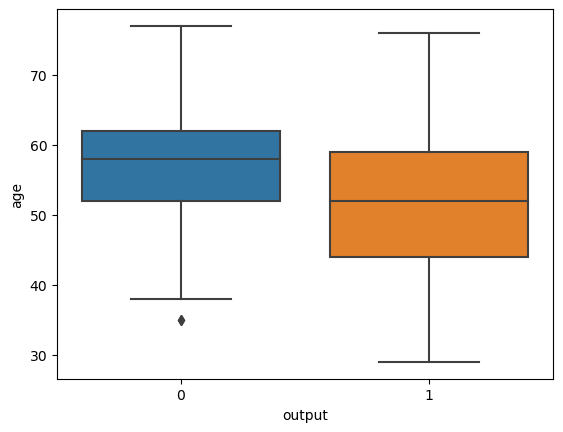

In [15]:
sns.boxplot(x = 'output', y = 'age', data=df)

In [16]:
df1 = df[df['output']==1]
df1['age'].sort_values()

72     29
58     34
125    34
157    35
65     35
       ..
60     71
25     71
151    71
129    74
144    76
Name: age, Length: 165, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

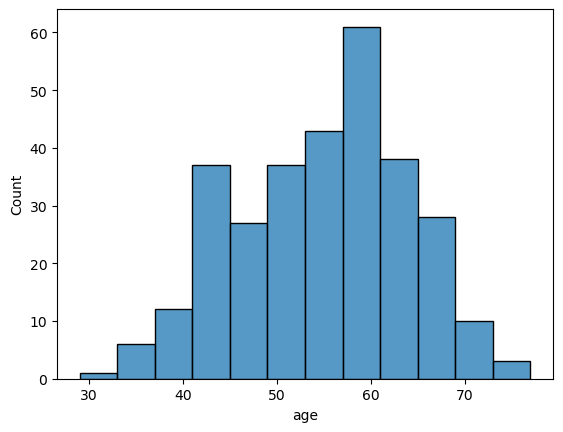

In [17]:
sns.histplot(x = 'age', data=df)
#Normall distributed(ish) so use MinMax

In [18]:
mm = MinMaxScaler()
df = pd.DataFrame(mm.fit_transform(df), columns=df.columns)
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000,0.0
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000,0.0
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000,0.0
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000,0.0


In [19]:
x = df.iloc[:, :-1]
y = df['output']

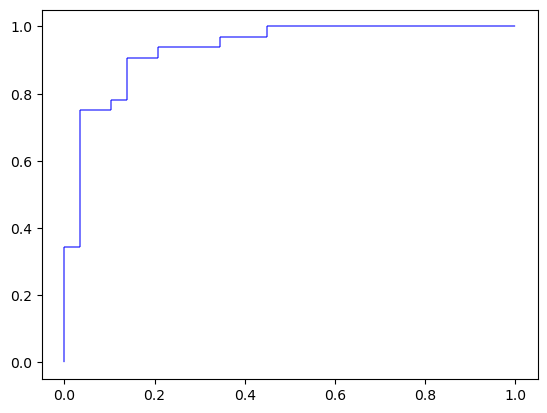

In [87]:
for i in range (20,30):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=29)
    lr = LogisticRegression()
    model1 = lr.fit(x_train, y_train)
    y_predict = lr.predict(x_test)
    y_prob = model1.predict_proba
    cvv = cross_val_score(lr, x_train, y_train, cv = 5, scoring='recall_macro')
    cc = confusion_matrix(y_test, y_predict)
    acc = accuracy_score(y_test, y_predict)
    rc = recall_score(y_test, y_predict)
    y_prob = model1.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    if auc > 0.93:
        dicti = {'i':i, 'FNR': 1-rc, 'RC': rc, 'CVV': cvv.mean(), 'CC': cc, 'AUC': auc}
        #print(dicti)
        #plt.plot(fpr, tpr)
        plt.plot(fpr, tpr, color='blue', lw=0.1, label=f'ROC curve (area = {auc:.2f})')
#print(thresholds)

In [88]:
dicti = {'a' : 'A', 'b':'B'}
pd.DataFrame(dicti, index = [1])

,a,b
1,A,B
